<a href="https://colab.research.google.com/github/official-okello/AirBnB_clone/blob/master/ARIMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

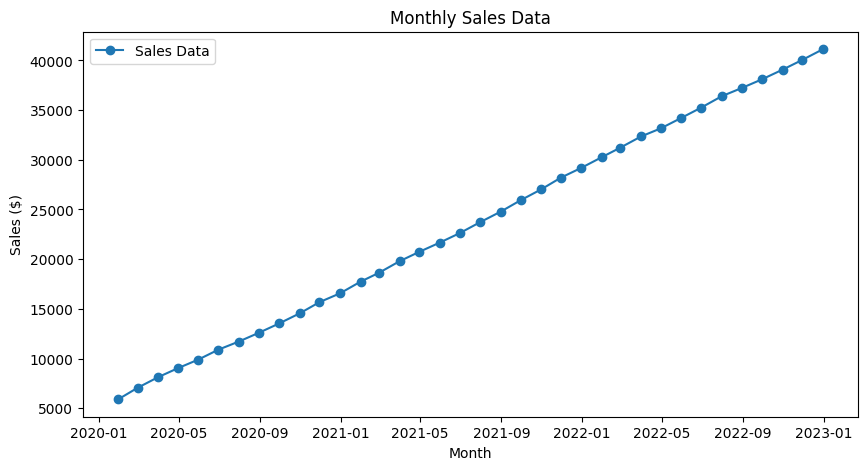

In [3]:
df = pd.read_csv('/content/Sales_Dataset.csv', parse_dates=["Month"], index_col="Month")

plt.figure(figsize=(10, 5))
plt.plot(df, marker="o", linestyle="-", label="Sales Data")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("Monthly Sales Data")
plt.legend()
plt.show()

In [6]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

print(f"Training Data: {len(train)} months")
print(f"Testing Data: {len(test)} months")

Training Data: 28 months
Testing Data: 8 months


In [8]:
model = ARIMA(train, order=(1, 1, 1))
arima_result = model.fit()

print(arima_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -168.421
Date:                Mon, 31 Mar 2025   AIC                            342.843
Time:                        12:13:46   BIC                            346.730
Sample:                    01-31-2020   HQIC                           343.999
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001   1307.110      0.000       0.998       1.001
ma.L1         -0.9345      0.158     -5.903      0.000      -1.245      -0.624
sigma2       1.34e+04   1.87e-06   7.15e+09      0.0

In [9]:
forecast_steps = 6
forecast = arima_result.forecast(steps=forecast_steps)

print(forecast)

2022-05-31    34179.916002
2022-06-30    35193.678133
2022-07-31    36207.286416
2022-08-31    37220.740875
2022-09-30    38234.041533
2022-10-31    39247.188413
Freq: ME, Name: predicted_mean, dtype: float64


In [10]:
predictions = arima_result.forecast(len(test))

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"Model Performance:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}")

Model Performance:
MAE: 120.35
MSE: 18828.52
RMSE: 137.22


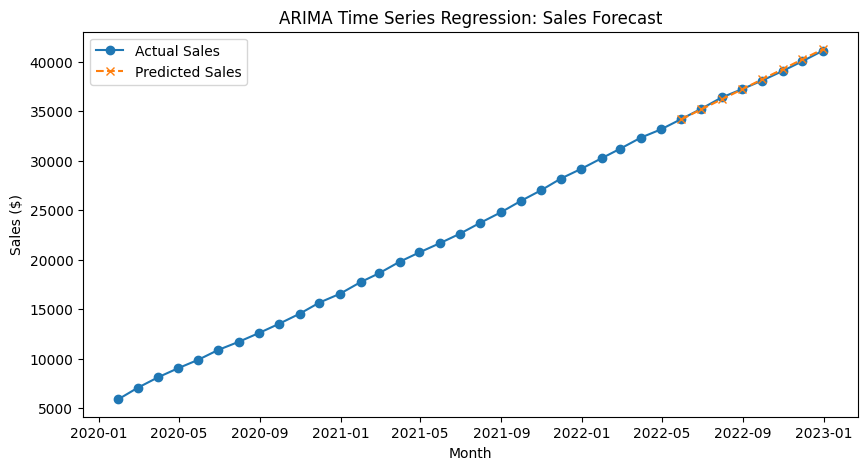

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Sales"], label="Actual Sales", marker="o")
plt.plot(test.index, predictions, label="Predicted Sales", linestyle="dashed", marker="x")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.title("ARIMA Time Series Regression: Sales Forecast")
plt.legend()
plt.show()